In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import RocCurveDisplay
import datetime as dt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neural_network import MLPClassifier
#import pydotplus
import graphviz
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from tqdm import tqdm, trange
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#import lazypredict
#from lazypredict.Supervised import LazyClassifier

In [2]:
df = pd.read_csv("dataset_maintenance.csv")

# Preprocessing

In [3]:
df.head(4)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0


In [4]:
df = df.rename(columns= {"Air temperature [K]":"air_temp", "Process temperature [K]": "pro_temp", "Rotational speed [rpm]": "R_speed", "Torque [Nm]":"Torque", "Tool wear [min]": "Tool_wear", "Machine failure": "Machine_failure" })

In [5]:
df.head(4)

,UDI,Product ID,Type,air_temp,pro_temp,R_speed,Torque,Tool_wear,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0


In [6]:
q1_x = df[["Type", "air_temp", "pro_temp", "R_speed", "Torque", "Tool_wear"]]

In [7]:
q1_x.head(4)

,Type,air_temp,pro_temp,R_speed,Torque,Tool_wear
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7


In [8]:
le = preprocessing.LabelEncoder()
le.fit(q1_x.Type)

LabelEncoder()

In [9]:
le.classes_

array(['H', 'L', 'M'], dtype=object)

In [10]:
q1_x.Type = le.transform(q1_x.Type)

/var/folders/tw/1phswt6x5554j9km66dp329h0000gp/T/ipykernel_26199/2930824300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q1_x.Type = le.transform(q1_x.Type)


In [11]:
q1_x

,Type,air_temp,pro_temp,R_speed,Torque,Tool_wear
0,2,298.1,308.6,1551,42.8,0
1,1,298.2,308.7,1408,46.3,3
2,1,298.1,308.5,1498,49.4,5
3,1,298.2,308.6,1433,39.5,7
4,1,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14
9996,0,298.9,308.4,1632,31.8,17
9997,2,299.0,308.6,1645,33.4,22
9998,0,299.0,308.7,1408,48.5,25


In [12]:
q1_y = df["Machine_failure"]

# Processing for Q2

In [13]:
q2_df = df[df.Machine_failure == 1]

In [14]:
q2_df

,UDI,Product ID,Type,air_temp,pro_temp,R_speed,Torque,Tool_wear,Machine_failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


In [15]:
q2_x = q2_df[["Type", "air_temp", "pro_temp", "R_speed", "Torque", "Tool_wear"]]

In [16]:
q2_x.head(4)

,Type,air_temp,pro_temp,R_speed,Torque,Tool_wear
50,L,298.9,309.1,2861,4.6,143
69,L,298.9,309.0,1410,65.7,191
77,L,298.8,308.9,1455,41.3,208
160,L,298.4,308.2,1282,60.7,216


In [17]:
q2_y = q2_df[["TWF", "HDF", "PWF", "OSF", "RNF"]]

In [18]:
q2_y.head(4)

,TWF,HDF,PWF,OSF,RNF
50,0,0,1,0,0
69,0,0,1,1,0
77,1,0,0,0,0
160,0,0,0,1,0


In [19]:
le = preprocessing.LabelEncoder()
le.fit(q2_x.Type)

LabelEncoder()

In [20]:
q2_x.Type = le.transform(q2_x.Type)

/var/folders/tw/1phswt6x5554j9km66dp329h0000gp/T/ipykernel_26199/4026372269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_x.Type = le.transform(q2_x.Type)


In [21]:
q2_x

,Type,air_temp,pro_temp,R_speed,Torque,Tool_wear
50,1,298.9,309.1,2861,4.6,143
69,1,298.9,309.0,1410,65.7,191
77,1,298.8,308.9,1455,41.3,208
160,1,298.4,308.2,1282,60.7,216
161,1,298.3,308.1,1412,52.3,218
...,...,...,...,...,...,...
9758,1,298.6,309.8,2271,16.2,218
9764,1,298.5,309.5,1294,66.7,12
9822,1,298.5,309.4,1360,60.9,187
9830,1,298.3,309.3,1337,56.1,206


# Question 1

In [29]:
X_train, X_test, y_train, y_test = train_test_split(q1_x, q1_y, test_size=.2, random_state =42)

In [30]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [77]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|███████████████████████████████████████████| 28/28 [00:06<00:00,  4.61it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.98               0.84     0.84      0.98   
XGBClassifier                      0.98               0.83     0.83      0.98   
BaggingClassifier                  0.99               0.83     0.83      0.99   
RandomForestClassifier             0.98               0.79     0.79      0.98   
NearestCentroid                    0.72               0.77     0.77      0.81   
AdaBoostClassifier                 0.98               0.74     0.74      0.98   
LabelSpreading                     0.98               0.73     0.73      0.97   
LabelPropagation                   0.97               0.73     0.73      0.97   
ExtraTreeClassifier                0.97               0.73     0.73      0.97   
PassiveAggressiveClassifier        0.96               0.72     0.72      0.96   
ExtraTreesClassifier        

# Tree Method

100%|█████████████████████████████████████████| 200/200 [00:25<00:00,  7.88it/s]

Optimal Degree is 10


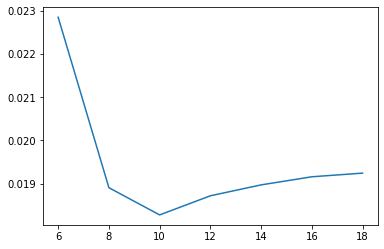

In [111]:
ks = np.arange(6,20, 2)
n_repeats = 200
accs_val = np.zeros((n_repeats, len(ks)))
criteria = "gini" 
max_depth = 6 
min_sample_leaf = 4

for i in tqdm(range(n_repeats)):
    X_train, X_test, y_train, y_test = train_test_split(q1_x, q1_y, test_size=.2)
    for j, k in enumerate(ks):
        clf_gini = DecisionTreeClassifier(criterion=criteria, random_state=100,
                                max_depth=k, min_samples_leaf=min_sample_leaf)
        clf_gini.fit(X_train, y_train)
        accs_val[i, j] = mean_squared_error(y_test, clf_gini.predict(X_test))
# Find optimal degree
scores = accs_val.mean(axis=0)
k = ks[np.argmin(scores)]
print("Optimal Degree is",k)

plt.plot(ks, scores)

In [128]:
# to build a tree, we could use 'gini' or 'entropy' as split criterion at each node. 
# here we use an example use 'gini' and with a few other hyperparameters.
criteria = "gini" 
max_depth = 10
min_sample_leaf = 4
clf_gini = DecisionTreeClassifier(criterion=criteria, random_state=100,
                                max_depth=max_depth, min_samples_leaf=min_sample_leaf)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
print("training score :",clf_gini.score(X_train, y_train))

training score : 0.990875


In [126]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1919,   10],
       [  30,   41]])

In [127]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("accuracy = " + str(accuracy))
print("precision = " + str(precision))
print("recall = " + str(recall))
print("f1 = " + str(f1))

accuracy = 0.98
precision = 0.8942645298242438
recall = 0.7861403777772911
f1 = 0.8309082761944218


# SVC

In [133]:
# ks = np.arange(6,20, 2)
n_repeats = 200
# accs_val = np.zeros((n_repeats, len(ks)))
kernels =['poly', 'sigmoid', 'linear', 'rbf']
counter = {}
#initializing kernels in dict
for i in kernels: 
    counter[i] = 0
    
for i in tqdm(range(n_repeats)):
    X_train, X_test, y_train, y_test = train_test_split(q1_x, q1_y, test_size=.2)
    tmplist = []
    tmpdict = {}
    for j, k in enumerate(kernels):
        svm_pipeline = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=2)),
                                 ('svm', SVC(kernel=k, C=1.0, random_state=42))])
        # Fit the pipeline to the training data
        svm_pipeline.fit(X_train, y_train)
        tmplist.append(mean_squared_error(y_test, svm_pipeline.predict(X_test)))
        tmpdict[k] = mean_squared_error(y_test, svm_pipeline.predict(X_test))
    for kernel, value in tmpdict.items():
        if value <= min(tmplist): 
            counter[kernel] +=1

100%|█████████████████████████████████████████| 200/200 [07:00<00:00,  2.10s/it]


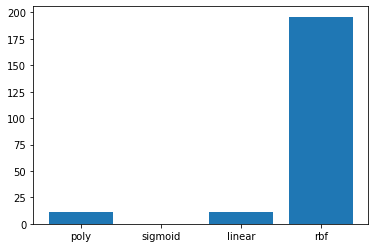

In [134]:
import matplotlib.pyplot as plt

names = list(counter.keys())
values = list(counter.values())

plt.bar(range(len(counter)), values, tick_label=names)
plt.show()

In [135]:
# Create a pipeline

svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('svm', SVC(kernel='rbf', C=1.0, random_state=42))
])
# Fit the pipeline to the training data
svm_pipeline.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = svm_pipeline.predict(X_test)

In [136]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("accuracy = " + str(accuracy))
print("precision = " + str(precision))
print("recall = " + str(recall))
print("f1 = " + str(f1))

accuracy = 0.9685
precision = 0.8846733668341709
recall = 0.5574531481022824
f1 = 0.5932321579034023


## Focusing on this random_state=42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(q1_x, q1_y, test_size=.2, random_state= 42)
# Create a pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('svm', SVC())
])

# Define the hyperparameters for grid search
params = {
    'svm__kernel': kernels,
    'svm__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#     'svm__gamma': [0.1, 1, 10]
}

# Perform grid search with cross-validation
svm_gridsearch = GridSearchCV(svm_pipeline, params, cv=5, verbose=1)
svm_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


In [ ]:
print("Best parameters:", grid.best_params_)
print("Accuracy = ",accuracy_score(y_test, grid.predict(X_test)))

# KNN

100%|█████████████████████████████████████████| 200/200 [04:48<00:00,  1.44s/it]

9


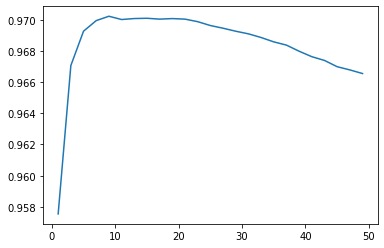

In [48]:
ks = np.arange(1, 50, 2)

n_repeats = 200
accs_val = np.zeros((n_repeats, len(ks)))

for i in tqdm(range(n_repeats)):
    X_train, X_test, y_train, y_test = train_test_split(q1_x, q1_y, test_size=.2)
    for j, k in enumerate(ks):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        accs_val[i, j] = accuracy_score(y_test, model.predict(X_test))

scores = accs_val.mean(axis=0)
k = ks[np.argmax(scores)]
print(k)

plt.plot(ks, scores)

In [ ]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("accuracy = " + str(accuracy))
print("precision = " + str(precision))
print("recall = " + str(recall))
print("f1 = " + str(f1))

# Question 2

In [25]:
q2_y.columns

Index(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], dtype='object')

In [43]:
for i in q2_y.columns: 
    amount= q2_y[q2_y[i] == 1]
    print(i,' :', len(amount))

TWF 46
HDF 115
PWF 95
OSF 98
RNF 1


## We do not have enough data to classify RNF 

In [44]:
#TWF
X_train, X_test, y_train, y_test = train_test_split(q2_x, q2_y["TWF"], test_size=.2, random_state =42)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|███████████████████████████████████████████| 28/28 [00:00<00:00, 36.97it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.99               0.97     0.97      0.99   
Perceptron                         0.90               0.91     0.91      0.90   
CalibratedClassifierCV             0.94               0.89     0.89      0.94   
SGDClassifier                      0.94               0.89     0.89      0.94   
LinearSVC                          0.94               0.89     0.89      0.94   
BaggingClassifier                  0.94               0.87     0.87      0.94   
DecisionTreeClassifier             0.94               0.87     0.87      0.94   
RandomForestClassifier             0.94               0.87     0.87      0.94   
ExtraTreesClassifier               0.94               0.87     0.87      0.94   
SVC                                0.93               0.86     0.86      0.92   
AdaBoostClassifier          

In [33]:
#HDF
X_train, X_test, y_train, y_test = train_test_split(q2_x, q2_y["HDF"], test_size=.2, random_state =42)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|███████████████████████████████████████████| 28/28 [00:00<00:00, 36.16it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.97               0.98     0.98      0.97   
XGBClassifier                      0.97               0.98     0.98      0.97   
BaggingClassifier                  0.99               0.98     0.98      0.99   
RandomForestClassifier             0.99               0.98     0.98      0.99   
LinearSVC                          0.96               0.97     0.97      0.96   
PassiveAggressiveClassifier        0.96               0.97     0.97      0.96   
DecisionTreeClassifier             0.97               0.97     0.97      0.97   
SGDClassifier                      0.94               0.96     0.96      0.94   
GaussianNB                         0.94               0.96     0.96      0.94   
QuadraticDiscriminantAnalysis      0.94               0.96     0.96      0.94   
CalibratedClassifierCV      

In [34]:
#PWF
X_train, X_test, y_train, y_test = train_test_split(q2_x, q2_y["PWF"], test_size=.2, random_state =42)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|███████████████████████████████████████████| 28/28 [00:00<00:00, 39.60it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
PassiveAggressiveClassifier        0.99               0.99     0.99      0.99   
AdaBoostClassifier                 0.97               0.95     0.95      0.97   
ExtraTreesClassifier               0.97               0.95     0.95      0.97   
QuadraticDiscriminantAnalysis      0.97               0.95     0.95      0.97   
BaggingClassifier                  0.97               0.95     0.95      0.97   
LinearSVC                          0.97               0.95     0.95      0.97   
XGBClassifier                      0.96               0.94     0.94      0.96   
KNeighborsClassifier               0.96               0.94     0.94      0.96   
DecisionTreeClassifier             0.96               0.94     0.94      0.96   
Perceptron                         0.94               0.93     0.93      0.94   
SVC                         

In [35]:
#OSF
X_train, X_test, y_train, y_test = train_test_split(q2_x, q2_y["OSF"], test_size=.2, random_state =42)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|███████████████████████████████████████████| 28/28 [00:00<00:00, 41.67it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      1.00               1.00     1.00      1.00   
RandomForestClassifier             0.99               0.99     0.99      0.99   
AdaBoostClassifier                 0.99               0.98     0.98      0.99   
QuadraticDiscriminantAnalysis      0.96               0.96     0.96      0.96   
BaggingClassifier                  0.96               0.96     0.96      0.96   
GaussianNB                         0.94               0.96     0.96      0.94   
SVC                                0.94               0.92     0.92      0.94   
BernoulliNB                        0.94               0.92     0.92      0.94   
ExtraTreesClassifier               0.94               0.91     0.91      0.94   
LogisticRegression                 0.93               0.91     0.91      0.93   
KNeighborsClassifier        

In [ ]:
def detect(data): 
    #twf = TWF_detector(data)
    #hdf = HDF_detector(data)
    #pwf = PWF_detector(data)
    #osf = OSF_detector(data)
    #return twf,hdf, pwf, osf

# def get_broken(data): 
#     t,h,p,o = detect(data)
#     print("TWF :{t}")
#     print("HDF :{h}")
#     print("PWF :{p}")
#     print("OSF :{o}")

# NN for Q1

In [209]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# 将数据集划分为训练集和测试集
#q2_y = q2_y.drop(['RNF'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(q1_x, q1_y, test_size=0.2, random_state=42)

# 对所有特征进行归一化
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [60]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(1e-3), metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/100


2023-04-03 13:39:34.812703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


249/250 [============================>.] - ETA: 0s - loss: 0.1894 - accuracy: 0.9635

2023-04-03 13:39:36.653149: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 2s 8ms/step - loss: 0.1890 - accuracy: 0.9635 - val_loss: 0.1405 - val_accuracy: 0.9695
Epoch 2/100
250/250 [==============================] - 2s 7ms/step - loss: 0.1529 - accuracy: 0.9653 - val_loss: 0.1236 - val_accuracy: 0.9695
Epoch 3/100
250/250 [==============================] - 2s 7ms/step - loss: 0.1367 - accuracy: 0.9653 - val_loss: 0.1058 - val_accuracy: 0.9695
Epoch 4/100
250/250 [==============================] - 2s 7ms/step - loss: 0.1141 - accuracy: 0.9653 - val_loss: 0.0943 - val_accuracy: 0.9695
Epoch 5/100
250/250 [==============================] - 2s 7ms/step - loss: 0.1049 - accuracy: 0.9661 - val_loss: 0.0873 - val_accuracy: 0.9715
Epoch 6/100
250/250 [==============================] - 2s 7ms/step - loss: 0.1008 - accuracy: 0.9672 - val_loss: 0.0864 - val_accuracy: 0.9705
Epoch 7/100
250/250 [==============================] - 2s 7ms/step - loss: 0.0971 - accuracy: 0.9671 - val_loss: 0.0829 - val_accuracy: 0.9740
Epoch 8/100

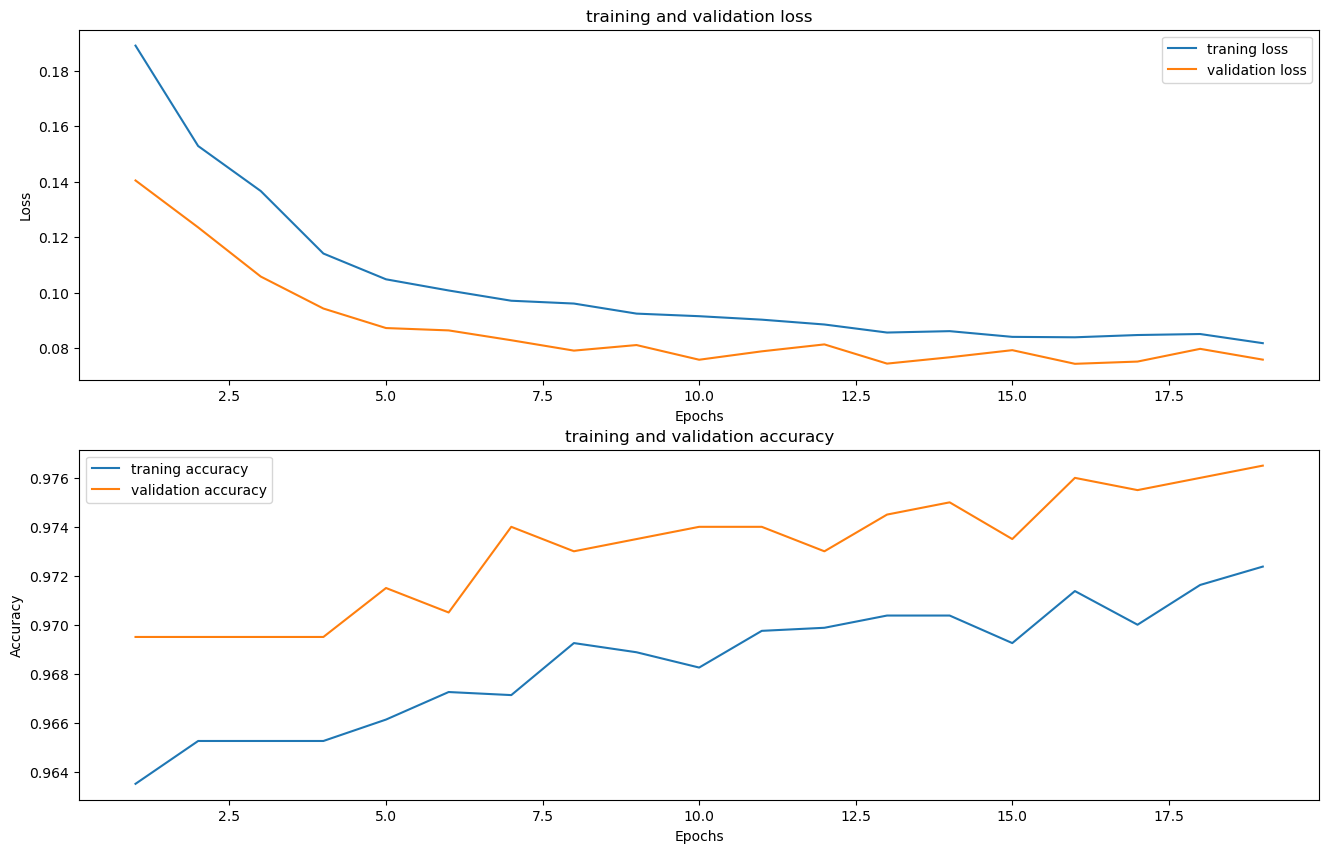

In [61]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss)+1)

# 畫損失函數圖
plt.figure(figsize=(16, 10))
plt.subplot(211)
plt.plot(epochs, loss, label='traning loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 畫準確率圖
plt.subplot(212)
plt.plot(epochs, acc, label='traning accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.title('training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [62]:
model.save("Q1.h5")

In [210]:
from tensorflow.keras.models import load_model

model = load_model("Q1.h5")

63/63 [==============================] - 0s 3ms/step


<AxesSubplot: title={'center': 'Confusion Matrix'}>

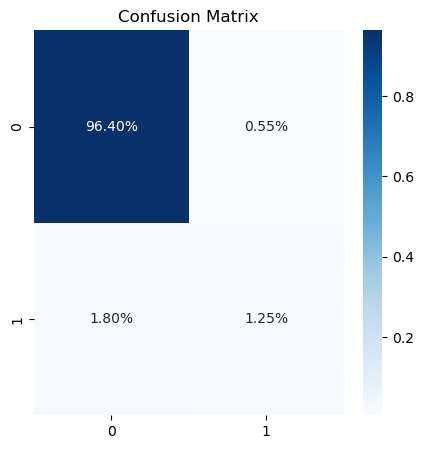

In [214]:
# 预测测试集数据
test_pred = model.predict(X_test)
# 将预测结果转换为类别（0或1），使用0.5作为阈值
test_pred_classes = (test_pred > 0.5).astype(int).flatten()

# 计算并打印混淆矩阵
#print("Confusion Matrix")
cf_mat = confusion_matrix(y_test, test_pred_classes)

# 绘制归一化的混淆矩阵
plt.figure(figsize=(5, 5))
plt.title(f"Confusion Matrix")
sns.heatmap(cf_mat / np.sum(cf_mat), annot=True, fmt=".2%", cmap="Blues")


In [211]:
from sklearn.metrics import classification_report

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 将预测结果转换为二进制标签（0或1），因为输出层使用了sigmoid激活函数
y_pred_binary = (y_pred > 0.5).astype(int)

# 生成评估报表
report = classification_report(y_test, y_pred_binary, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print(report_df)


49/63 [======================>.......] - ETA: 0s

2023-04-03 19:32:12.693788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


63/63 [==============================] - 0s 3ms/step
              precision    recall  f1-score    support
0              0.981670  0.994327  0.987958  1939.0000
1              0.694444  0.409836  0.515464    61.0000
accuracy       0.976500  0.976500  0.976500     0.9765
macro avg      0.838057  0.702082  0.751711  2000.0000
weighted avg   0.972910  0.976500  0.973547  2000.0000


# NN for Q2

In [105]:
q2_y = q2_y.drop(['RNF'], axis=1)

In [199]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# 将数据集划分为训练集和测试集
#q2_y = q2_y.drop(['RNF'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(q2_x, q2_y, test_size=0.2, random_state=42)

# 对所有特征进行归一化
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [200]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.legacy.Adam(1e-3), metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/100


2023-04-03 16:27:49.350535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 0.6842 - accuracy: 0.2989

2023-04-03 16:27:51.203083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 2s 187ms/step - loss: 0.6842 - accuracy: 0.2989 - val_loss: 0.6581 - val_accuracy: 0.3088
Epoch 2/100
9/9 [==============================] - 0s 39ms/step - loss: 0.6480 - accuracy: 0.3469 - val_loss: 0.6129 - val_accuracy: 0.3088
Epoch 3/100
9/9 [==============================] - 0s 33ms/step - loss: 0.6035 - accuracy: 0.3026 - val_loss: 0.5774 - val_accuracy: 0.3088
Epoch 4/100
9/9 [==============================] - 0s 22ms/step - loss: 0.5762 - accuracy: 0.3506 - val_loss: 0.5623 - val_accuracy: 0.3088
Epoch 5/100
9/9 [==============================] - 0s 20ms/step - loss: 0.5623 - accuracy: 0.3579 - val_loss: 0.5631 - val_accuracy: 0.3088
Epoch 6/100
9/9 [==============================] - 0s 43ms/step - loss: 0.5458 - accuracy: 0.3764 - val_loss: 0.5623 - val_accuracy: 0.3088
Epoch 7/100
9/9 [==============================] - 0s 11ms/step - loss: 0.5360 - accuracy: 0.4317 - val_loss: 0.5551 - val_accuracy: 0.3824
Epoch 8/100
9/9 [==============

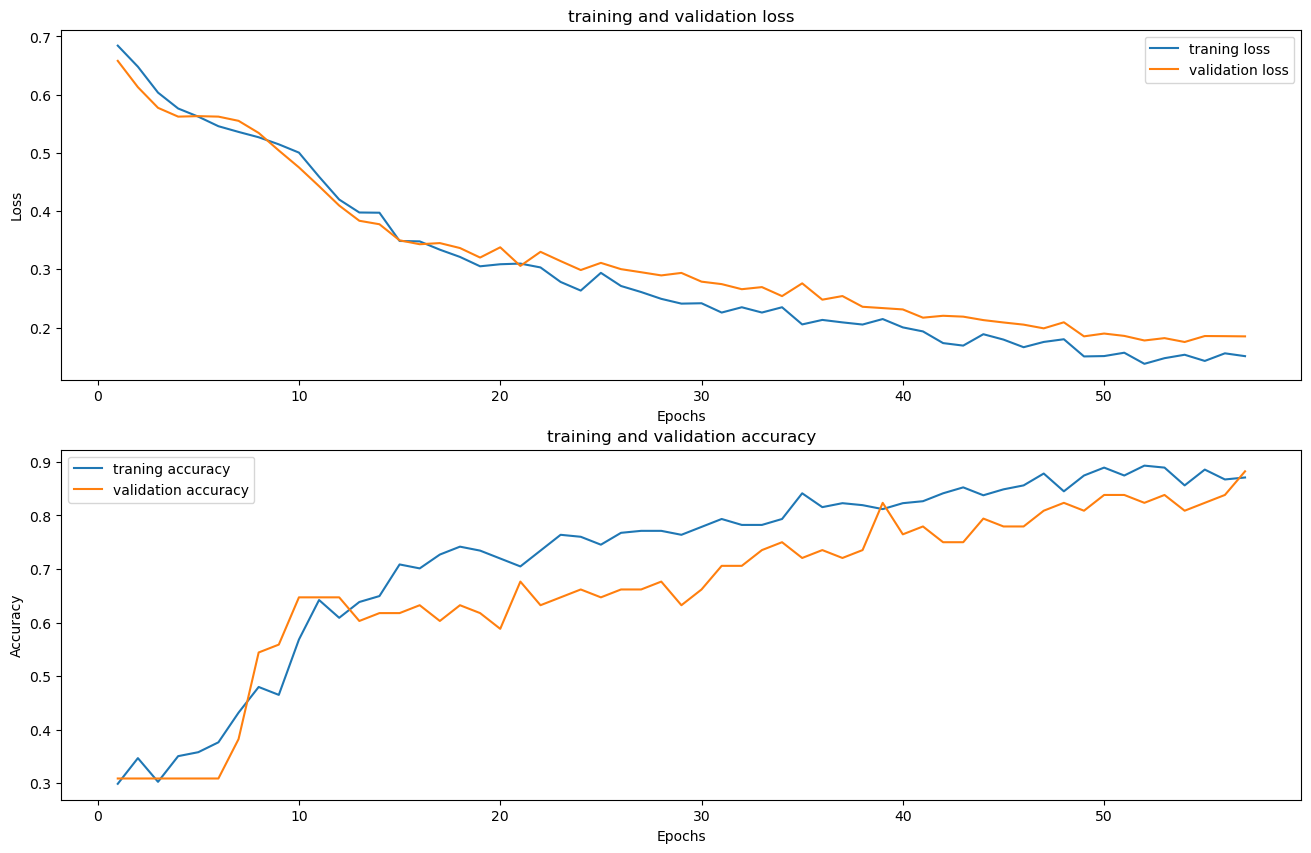

In [201]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss)+1)

# 畫損失函數圖
plt.figure(figsize=(16, 10))
plt.subplot(211)
plt.plot(epochs, loss, label='traning loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.title('training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 畫準確率圖
plt.subplot(212)
plt.plot(epochs, acc, label='traning accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.title('training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [203]:
model.save("Q2.h5")

In [204]:
from tensorflow.keras.models import load_model

model = load_model("Q2.h5")

3/3 [==============================] - 0s 15ms/step


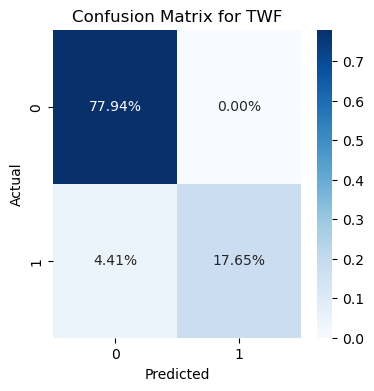

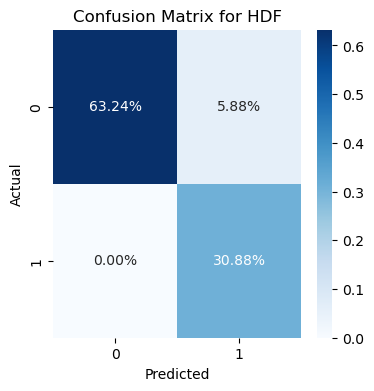

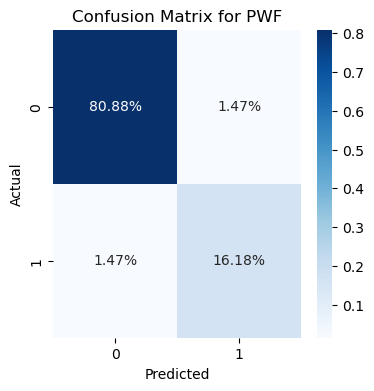

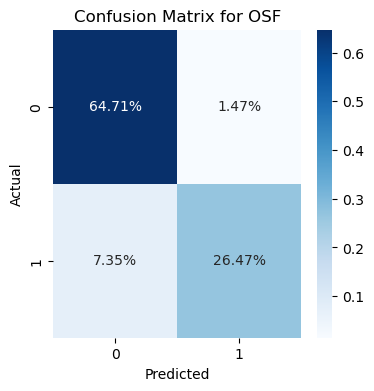

In [208]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 使用模型进行预测
y_pred = model.predict(X_test)

# 将预测结果转换为二进制形式（阈值为0.5）
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# 计算并绘制每个类别的混淆矩阵
class_names = ['TWF', 'HDF', 'PWF', 'OSF']

for i, class_name in enumerate(class_names):
    plt.figure(figsize=(4, 4))
    cf_mat = confusion_matrix(y_test.iloc[:, i], y_pred_binary[:, i])
    sns.heatmap(cf_mat / np.sum(cf_mat), annot=True, fmt='.2%', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {class_name}")
    plt.show()


In [205]:
from sklearn.metrics import classification_report

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 将预测结果转换为二进制标签（0或1），因为输出层使用了sigmoid激活函数
y_pred_binary = (y_pred > 0.5).astype(int)

# 生成评估报告
report = classification_report(y_test, y_pred_binary, target_names=['TWF', 'HDF', 'PWF', 'OSF'])

print(report)

3/3 [==============================] - 0s 23ms/step
              precision    recall  f1-score   support

         TWF       1.00      0.80      0.89        15
         HDF       0.84      1.00      0.91        21
         PWF       0.92      0.92      0.92        12
         OSF       0.95      0.78      0.86        23

   micro avg       0.91      0.87      0.89        71
   macro avg       0.93      0.87      0.89        71
weighted avg       0.92      0.87      0.89        71
 samples avg       0.89      0.86      0.87        71



2023-04-03 16:28:34.706233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/LeoSu/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/LeoSu/miniforge3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
